## LNG Demand Forecasting Model 

Liquefied Natural Gas (LNG) is natural gas that has been cooled to a liquid state at around -162°C (-260°F) to reduce its volume for easier storage and transportation. LNG is composed primarily of methane (CH₄) along with small amounts of other hydrocarbons. By liquefying natural gas, its volume is reduced by approximately 600 times, making it more efficient to transport over long distances where pipelines are not feasible.

Uses of LNG in India

LNG plays a crucial role in India's energy ecosystem and is used across various sectors:

1. Energy Generation : 
LNG is used in power plants to generate electricity as it is cleaner than coal and other fossil fuels.
Gas-based power generation is being encouraged to reduce carbon emissions.
2. Industrial Applications : 
Industries like fertilizer production, petrochemicals, and ceramics use LNG as a fuel source.
LNG is also employed in steel production and other heavy industries requiring high-energy inputs.
3. Transportation : 
LNG is increasingly being used as a fuel for vehicles, especially in heavy-duty trucks and buses, due to its lower emissions compared to diesel.
The Indian government is promoting the adoption of LNG as a cleaner alternative for the transportation sector.
4. City Gas Distribution (CGD) : 
LNG is converted back to natural gas and supplied to households through pipelines for cooking (Piped Natural Gas - PNG) and commercial establishments.
It is also used as Compressed Natural Gas (CNG) for vehicles.
5. Shipping and Marine Fuel : 
LNG is used as a fuel in the maritime sector to reduce greenhouse gas emissions from shipping.


India is one of the largest importers of LNG due to its rising energy demand and limited domestic natural gas production. The country has established several LNG terminals along its coastline to import and regasify LNG.

Some key LNG terminals are:

1. Dahej LNG Terminal (Gujarat): Operated by Petronet LNG, one of the largest terminals in India.
2. Hazira LNG Terminal (Gujarat): Operated by Shell and Total.
3. Kochi LNG Terminal (Kerala): Important for southern India’s LNG supply.
4. Ennore LNG Terminal (Tamil Nadu): India's first east coast LNG terminal.
5. Mundra LNG Terminal (Gujarat): Recently developed to expand LNG handling capacity.

##### Understanding the Dataset 

In [147]:
# Importing the dataset 
import pandas as pd # for data handling and manupulation
import numpy as np # for numerical computations 
df = pd.read_csv('Dataset for demand forecasting model.csv')
df.head()

,Year Range,Month,Demand values (Million Metric tons),GDP(trillion INR),Industrial Production Index (percentage increase ),Overall Agricultural Prodcution(million tons),Power Generation capacity (Gigawatts),Renewable Energy (Gigawatt),Energy Efficiency (million units),Fertilizer Production ( Million Metric Tons),Fuel Consumption(Million Tonnes),Population Growth rate in %
0,2011-12,Jan,4.21,7.28,154.1,24.39,"1,757.62",1.01,0.09,1.23,10.41,1.28
1,2011-12,Feb,4.22,7.27,155.6,25.15,"1,771.39",1.03,0.10,1.18,9.53,1.27
2,2011-12,Mar,4.23,7.29,157.2,26.31,"1,785.17",1.05,0.11,1.35,11.35,1.29
3,2011-12,Apr,4.21,7.26,159.1,27.58,"1,798.95",1.07,0.12,1.42,11.73,1.31
4,2011-12,May,4.22,7.28,160.9,28.91,"1,812.73",1.09,0.13,1.50,12.25,1.33


In [148]:
# # Getting the shape of the dataset
df.shape 
# So, it has 156 datapoints with 11 featues and 1 target variable 

(156, 12)

In [149]:
# Getting all the featurs
df.columns

Index(['Year Range', 'Month', 'Demand values (Million Metric tons) ',
       'GDP(trillion INR)',
       'Industrial Production Index (percentage increase )',
       'Overall Agricultural Prodcution(million tons) ',
       'Power Generation capacity (Gigawatts)', 'Renewable Energy (Gigawatt)',
       ' Energy Efficiency (million units)',
       'Fertilizer Production ( Million Metric Tons)',
       'Fuel Consumption(Million Tonnes) ', 'Population Growth rate in % '],
      dtype='object')

UNDERSTADING EACH FEATURES OF THE DATASET

1. Historical Gas Demand
What: A record of past gas usage patterns in India.
Why: Analyzing historical demand patterns helps us understand how demand might change in the future.
Example: By examining historical data, we can see that gas demand tends to peak during winter months (December to February) due to heating needs.
2. GDP Growth Rate
What: The rate of change in Gross Domestic Product (GDP) in India.
Why: GDP growth can impact energy demand, including natural gas.
Example: Rapid GDP growth of India can drive up gas demand for industries and households.
3. Industrial Production Index (IPI)
What: A measure of industrial production in India, including manufacturing, mining, and utilities.
Why: Industries are significant consumers of natural gas, and changes in industrial production can impact gas demand.
Example: An increase in steel production in western India can drive up gas demand for power generation and industrial processes.
4. Agricultural Production (Crop Yields, Irrigation Patterns)
What: Agricultural production levels in India, including crop yields and irrigation patterns.
Why: Agriculture is a significant sector in India, and changes in agricultural production can impact gas demand.
Example: An increase in rice production in eastern India can drive up gas demand for irrigation and fertilizers.
5. Power Generation Capacity (Gas-based, Renewable)
What: The total capacity of power plants in India, including gas-based and renewable energy sources.
Why: Power generation is a significant consumer of natural gas, and changes in power generation capacity can impact gas demand.
Example: An increase in gas-based power generation capacity in southern India can drive up gas demand for electricity generation.
6. Renewable Energy Targets
What : Government policies and regulations that promote the use of renewable energy sources in India.
Why : Renewable energy targets can reduce gas demand for power generation, as renewable energy sources become a larger share of the energy mix.
Example : India's renewable energy targets, such as the National Solar Mission, can reduce gas demand for power generation.
7. Energy Efficiency Standards
What : Government policies and regulations that promote energy efficiency in industries, households, and other sectors in India.
Why : Energy efficiency standards can reduce gas demand by promoting the use of energy-efficient technologies and practices.
Example : India's energy efficiency standards, such as the Energy Conservation Building Code, can reduce gas demand for industries and households.
8. Fertilizer Production
What: The total production of fertilizers in India, which are significant consumers of natural gas.
Why: Fertilizer production is a gas-intensive process, and changes in fertilizer production can impact gas demand.
Example: An increase in fertilizer production in western India can drive up gas demand for fertilizer manufacturing.
9. Fuel Consumption Patterns
What : The trends and changes in fuel consumption patterns in India's transportation sector.
Why : Fuel consumption patterns in the transportation sector can significantly impact gas demand, as changes in fuel efficiency, vehicle technology, and consumer behavior can influence the amount of fuel consumed.
Example : A shift towards more fuel-efficient vehicles or alternative fuels in India's transportation sector can reduce gas demand, while an increase in fuel consumption due to growing vehicle sales can drive up gas demand.
10. Population Growth and Urbanization
What: The rate of change in population and urbanization in India.
Why: A growing population and urbanization can increase energy demand, including natural gas.
Example: Rapid urbanization in cities like Mumbai and Delhi can drive up gas demand for cooking, heating, and power generation.

In [150]:
# Getting the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Year Range                                          156 non-null    object 
 1   Month                                               156 non-null    object 
 2   Demand values (Million Metric tons)                 156 non-null    float64
 3   GDP(trillion INR)                                   156 non-null    float64
 4   Industrial Production Index (percentage increase )  156 non-null    float64
 5   Overall Agricultural Prodcution(million tons)       156 non-null    float64
 6   Power Generation capacity (Gigawatts)               156 non-null    object 
 7   Renewable Energy (Gigawatt)                         156 non-null    float64
 8    Energy Efficiency (million units)                  156 non-null    float64
 9  

In [151]:
# Getting the description of the dataset 
df.describe()

,Demand values (Million Metric tons),GDP(trillion INR),Industrial Production Index (percentage increase ),Overall Agricultural Prodcution(million tons),Renewable Energy (Gigawatt),Energy Efficiency (million units),Fertilizer Production ( Million Metric Tons),Fuel Consumption(Million Tonnes),Population Growth rate in %
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,4.086603,12.837115,409.250000,267.764936,2.863077,0.425000,1.750064,14.261474,1.505769
std,0.221434,3.678296,210.703151,184.067850,1.239125,0.172217,0.277648,2.381750,0.174995
min,3.750000,7.260000,154.100000,24.390000,1.010000,0.090000,1.180000,9.530000,1.250000
25%,3.890000,9.957500,218.425000,96.050000,1.717500,0.297500,1.520000,12.487500,1.367500
50%,4.155000,13.140000,355.200000,240.060000,2.775000,0.415000,1.760000,14.055000,1.470000
75%,4.230000,14.812500,574.650000,420.150000,3.937500,0.562500,1.972500,15.912500,1.610000
max,4.440000,21.300000,859.000000,630.270000,5.100000,0.760000,2.320000,20.850000,2.040000


### Dataset Description Based on Data

1. **DEMAND VALUES (Million Metric Tons)**  
   - **Mean:** The average monthly demand is **4.087 million metric tons**.
   - **Range:** Demand values vary from **3.75** to **4.44**, indicating relatively low variability.
   - **Standard Deviation:** **0.2214**, showing stable monthly demand patterns with minimal fluctuations.
   - **Conclusion:** The consistent demand pattern allows the model to focus on small variations influenced by seasonal and industrial factors, making forecasting more accurate.

2. **GDP (Trillion INR)**  
   - **Mean:** The average GDP is **12.837 trillion INR**, indicating stable economic activity.
   - **Range:** GDP ranges from **7.26** to **21.30 trillion INR**, reflecting a growing economy.
   - **Standard Deviation:** **3.6783**, showing moderate variability in economic growth.
   - **Conclusion:** GDP is a significant input feature, as economic growth directly correlates with increased energy demand, helping the model capture economic influences.

3. **INDUSTRIAL PRODUCTION INDEX (Percentage Increase)**  
   - **Mean:** The average production index increase is **409.25%**, showcasing industrial growth trends.
   - **Range:** Index values vary from **154.1%** to **859.0%**, indicating substantial industrial variability.
   - **Standard Deviation:** **210.7032**, reflecting noticeable industrial production changes.
   - **Conclusion:** Industrial production index serves as a vital feature, capturing fluctuations in industrial activity that drive demand patterns.

4. **OVERALL AGRICULTURAL PRODUCTION (Million Tons)**  
   - **Mean:** The average agricultural output is **267.765 million tons**, providing a benchmark for production levels.
   - **Range:** Output ranges from **24.39** to **630.27 million tons**, showing significant variability.
   - **Standard Deviation:** **184.0679**, reflecting high fluctuations due to seasonal factors.
   - **Conclusion:** Agricultural output affects demand seasonality and regional energy requirements, making it a relevant input for forecasting.

5. **POWER GENERATION CAPACITY (Gigawatts)**  
   - **Mean:** The average power generation capacity is **3248.886 GWh**, indicating a steady increase over the years.
   - **Range:** Capacity ranges from **2749.80** to **3893.54 GWh**, showing substantial growth.
   - **Standard Deviation:** **366.1147**, reflecting steady expansion in power generation capacity.
   - **Conclusion:** Power generation capacity trends impact the demand balance, providing critical insights for the model.

6. **RENEWABLE ENERGY (Gigawatts)**  
   - **Mean:** The average renewable energy capacity is **4.863 GW**, showcasing growing adoption of sustainable energy sources.
   - **Range:** Capacity ranges from **1.01** to **7.50 GW**, showing moderate growth.
   - **Standard Deviation:** **2.2754**, reflecting steady expansion in renewable energy.
   - **Conclusion:** Renewable energy trends impact the demand balance, particularly during peak periods, providing critical insights for the model.

7. **ENERGY EFFICIENCY (Million Units)**  
   - **Mean:** The average energy efficiency is **0.525 million units**, highlighting baseline performance.
   - **Range:** Values range from **0.09** to **0.91 million units**, reflecting significant potential for improvement.
   - **Standard Deviation:** **0.2374**, indicating moderate variability.
   - **Conclusion:** Energy efficiency serves as a moderating factor in demand modeling, reflecting energy savings trends.

8. **FERTILIZER PRODUCTION (Million Metric Tons)**  
   - **Mean:** The average fertilizer production is **1.888 million metric tons**, supporting agricultural activities.
   - **Range:** Production varies from **1.18** to **2.52 million metric tons**, showing moderate variability.
   - **Standard Deviation:** **0.4061**, reflecting consistent production patterns.
   - **Conclusion:** Fertilizer production is a relevant feature to capture agricultural demand impacts on energy usage.

9. **FUEL CONSUMPTION (Million Tonnes)**  
   - **Mean:** The average fuel consumption is **16.103 million tonnes**, providing a baseline for industrial and transportation needs.
   - **Range:** Consumption varies from **9.53** to **23.05 million tonnes**, showing high variability.
   - **Standard Deviation:** **3.4554**, reflecting significant consumption changes.
   - **Conclusion:** Fuel consumption directly impacts energy demand and is a critical feature for accurate forecasting.

10. **POPULATION GROWTH RATE (%)**  
    - **Mean:** The average growth rate is **1.491%**, reflecting steady population growth.
    - **Range:** Growth rates vary from **1.25%** to **2.04%**, showing low variability.
    - **Standard Deviation:** **0.1741**, indicating consistent population trends.
    - **Conclusion:** Population growth is a stable factor affecting long-term energy demand trends.

## Exploratory Data Analysis

In [152]:
# Importing the libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Demand Features

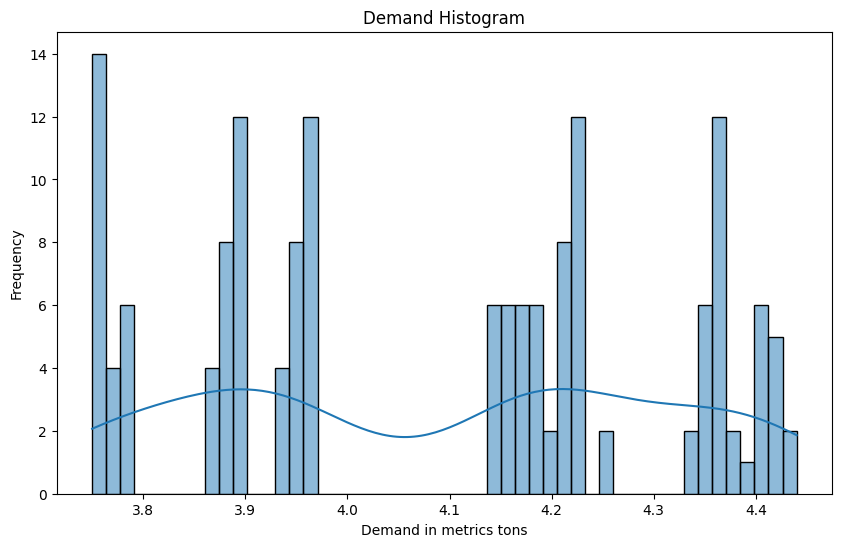

In [153]:
# Histogram: A histogram will help us understand the distribution of demand.
# Demand histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Demand values (Million Metric tons) '], bins=50, kde=True)
plt.title('Demand Histogram')
plt.xlabel('Demand in metrics tons')
plt.ylabel('Frequency')
plt.show()

The demand has peaks around 3.9, and 4.3 metric tons, showing it varies a lot and isn’t evenly spread. Model should handle these ups and downs, so advanced methods might work better than simple ones.

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\1196498991.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Demand values (Million Metric tons) '], shade=True)


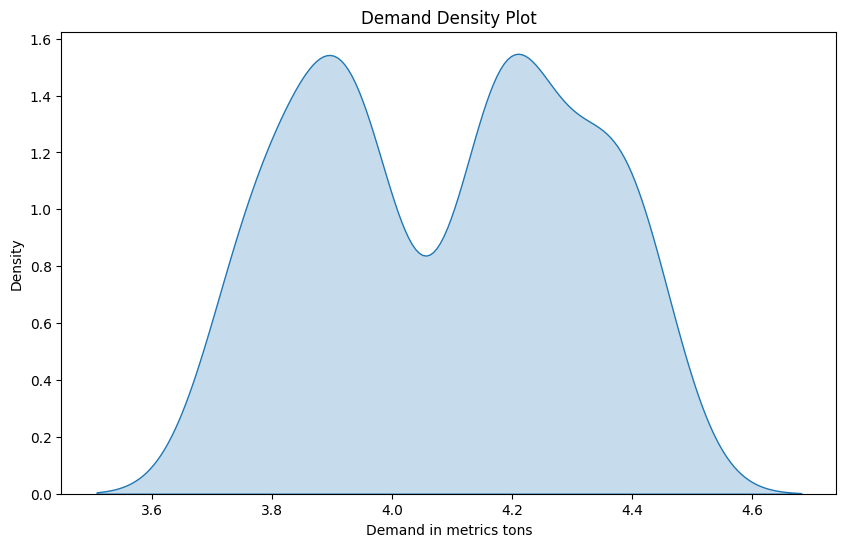

In [154]:
# Density Plot: A density plot will provide a smoother representation of the demand distribution.
# Demand density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Demand values (Million Metric tons) '], shade=True)
plt.title('Demand Density Plot')
plt.xlabel('Demand in metrics tons')
plt.ylabel('Density')
plt.show()

This density plot suggests that the demand distribution is bimodal, with two peaks around 3.9 and 4.3 million metric tons. This indicates two distinct levels of demand, which forecasting model should account for.

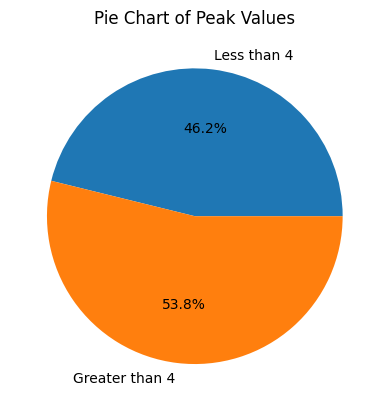

In [155]:
# Count occurrences of each peak value
data = df['Demand values (Million Metric tons) ']
less_than_4 = [x for x in data if x < 4]
greater_than_4 = [x for x in data if x > 4]

# Create pie chart
plt.pie([len(less_than_4), len(greater_than_4)], labels=['Less than 4', 'Greater than 4'], autopct='%1.1f%%')
plt.title('Pie Chart of Peak Values')
plt.show()

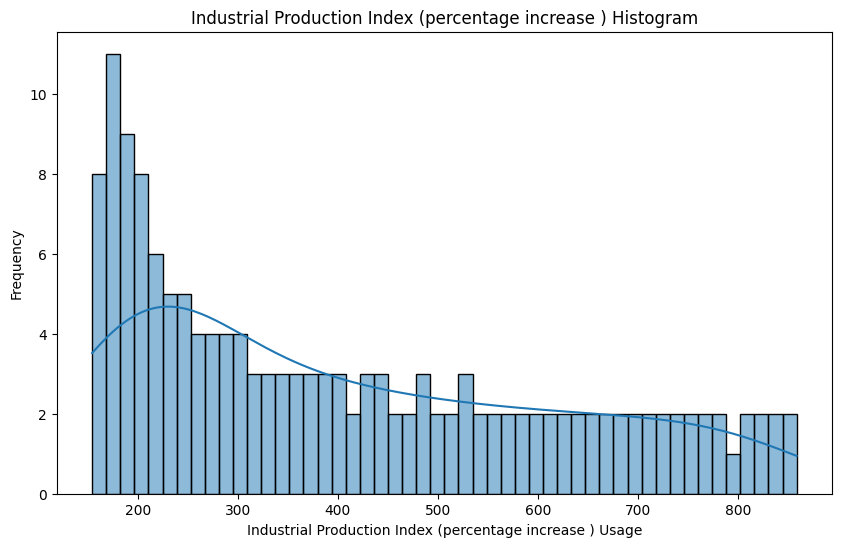

In [156]:
# Industrial usage histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Industrial Production Index (percentage increase )'], bins=50, kde=True)
plt.title('Industrial Production Index (percentage increase ) Histogram')
plt.xlabel('Industrial Production Index (percentage increase ) Usage')
plt.ylabel('Frequency')
plt.show()

From the histogram, here are the key observations:

1. **Skewed Distribution**: The data appears to be right-skewed, as most of the values are concentrated on the left side (lower range) with a gradual decrease in frequency as the values increase.

2. **Peak Frequency**: The highest frequency occurs at the lower end of the industrial production index, likely between 100–200.

3. **Long Tail**: The distribution has a long tail, indicating that higher values of the industrial production index are less common.

In [157]:
# let's LABEL ENCODE the month into 12 so as to use it for the forecasting model as this would act as a thing to classify the peaks of demand 
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
# Fit the LabelEncoder object to the data and transform it
df['Month'] = le.fit_transform(df['Month'])

In [158]:
df.sample(2)

,Year Range,Month,Demand values (Million Metric tons),GDP(trillion INR),Industrial Production Index (percentage increase ),Overall Agricultural Prodcution(million tons),Power Generation capacity (Gigawatts),Renewable Energy (Gigawatt),Energy Efficiency (million units),Fertilizer Production ( Million Metric Tons),Fuel Consumption(Million Tonnes),Population Growth rate in %
126,2011-12,5,4.15,15.30,641.0,470.19,3493.92,4.23,0.61,1.87,13.65,1.46
62,2016-17,7,4.34,12.63,289.0,176.83,"2,612.00",2.31,0.35,1.60,16.05,1.62


This histogram shows the Industrial Production Index has a right-skewed distribution, with higher frequencies in the lower range (around 100-200). Your demand forecasting model should consider that higher production percentages occur less frequently.

IMP : 
Anytime your data consists of time , prices or distances (i.e values that has to be positive) your distrubtuion will be right skeewed 

https://youtu.be/LCDiQxB5S84

In [159]:
# To solve the Right skewness we use log transformation (taking the log of all the values and then plotting it)
df['Industrial Production Index (percentage increase )'] = np.log(df['Industrial Production Index (percentage increase )'])

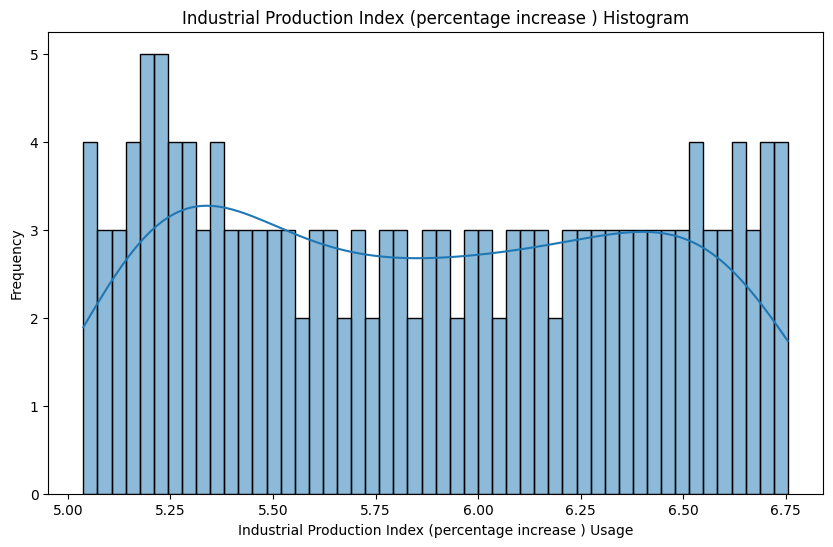

In [160]:
# Industrial Production Index (percentage increase) histogram after applying the log transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['Industrial Production Index (percentage increase )'], bins=50, kde=True)
plt.title('Industrial Production Index (percentage increase ) Histogram')
plt.xlabel('Industrial Production Index (percentage increase ) Usage')
plt.ylabel('Frequency')
plt.show()

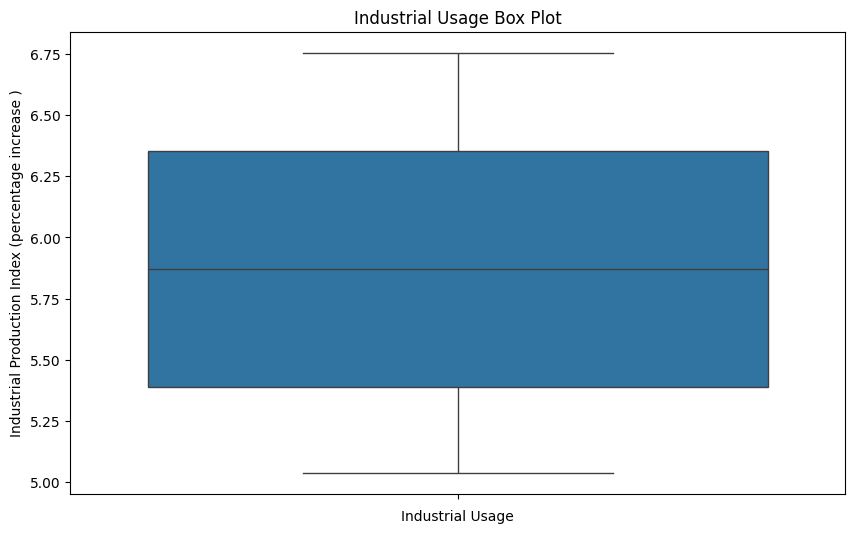

In [161]:
# Industrial Production Index box plot
plt.figure(figsize=(10, 6))
sns.boxplot(df['Industrial Production Index (percentage increase )'])
plt.title('Industrial Usage Box Plot')
plt.xlabel('Industrial Usage')
plt.show()

The box plot indicates that the industrial usage data is symmetrically distributed with no significant outliers. The median is around 5.80, and the data range spans from approximately 5 to 6.5.

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\1490580052.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Industrial Production Index (percentage increase )'], shade=True)


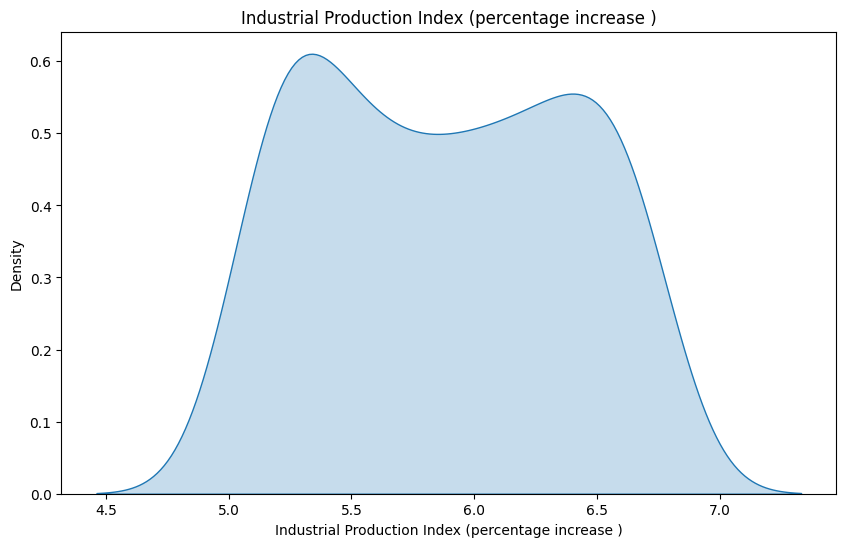

In [162]:
# Industrial Production Index (percentage increase ) density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Industrial Production Index (percentage increase )'], shade=True)
plt.title('Industrial Production Index (percentage increase )')
plt.xlabel('Industrial Production Index (percentage increase )')
plt.ylabel('Density')
plt.show()

In [163]:
# Applying LOG Transformation
df['Industrial Production Index (percentage increase )'] = np.log(df['Industrial Production Index (percentage increase )'])

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\1490580052.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Industrial Production Index (percentage increase )'], shade=True)


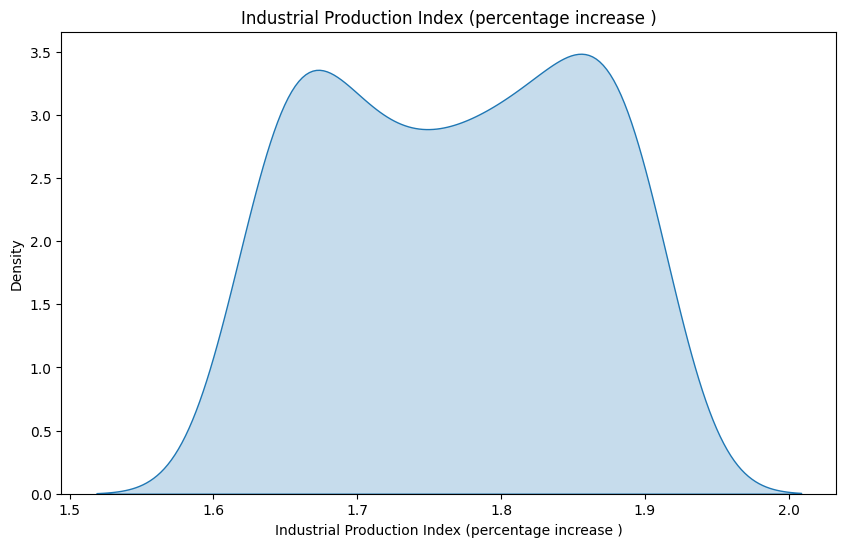

In [164]:
# Industrial Production Index (percentage increase ) density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Industrial Production Index (percentage increase )'], shade=True)
plt.title('Industrial Production Index (percentage increase )')
plt.xlabel('Industrial Production Index (percentage increase )')
plt.ylabel('Density')
plt.show()

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\1413056895.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Month'], shade=True)


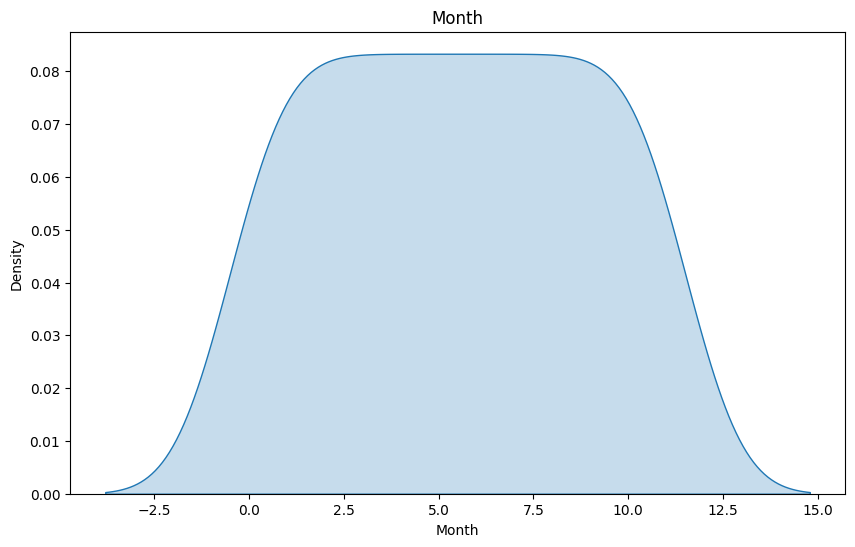

In [165]:
# Month density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Month'], shade=True)
plt.title('Month')
plt.xlabel('Month')
plt.ylabel('Density')
plt.show()

This is a Normal Distribution

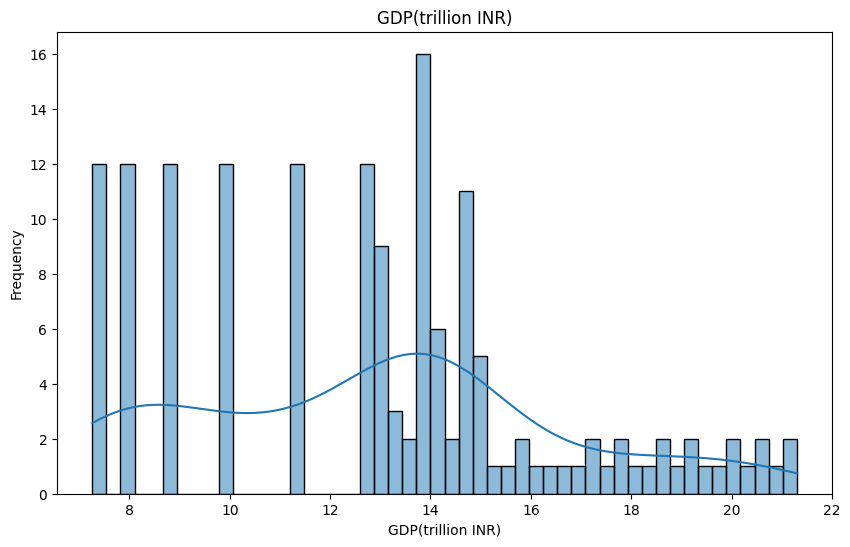

In [166]:
# GDP(trillion INR) histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP(trillion INR)'], bins=50, kde=True)
plt.title('GDP(trillion INR)')
plt.xlabel('GDP(trillion INR)')
plt.ylabel('Frequency')
plt.show()

The GDP distribution shows a peak around 14 trillion INR, with fewer occurrences at higher values. The data is slightly right-skewed.

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\3956007070.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['GDP(trillion INR)'], shade=True)


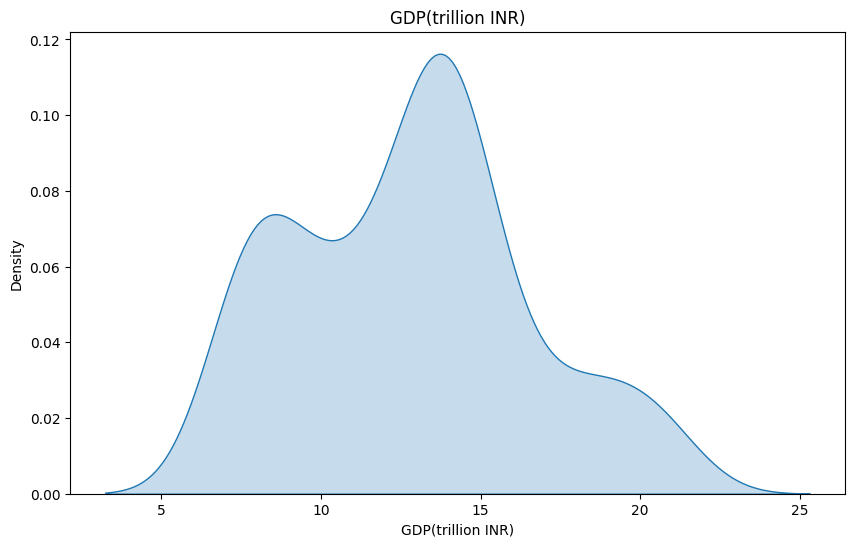

In [167]:
# GDP density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['GDP(trillion INR)'], shade=True)
plt.title('GDP(trillion INR)')
plt.xlabel('GDP(trillion INR)')
plt.ylabel('Density')
plt.show()

This is Right skeweed graph , lets fix this by applying square root transformation

In [168]:
df['GDP(trillion INR)'] = np.sqrt(df['GDP(trillion INR)'])

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\3956007070.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['GDP(trillion INR)'], shade=True)


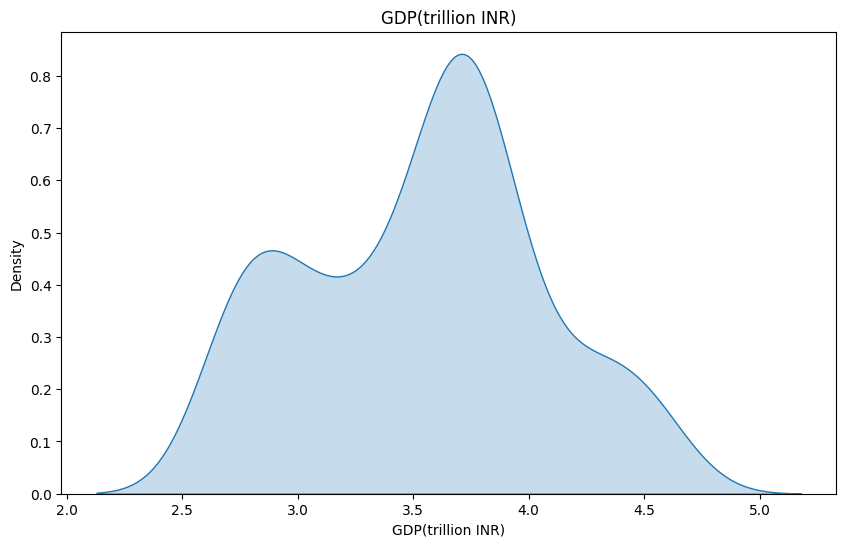

In [169]:
# GDP density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['GDP(trillion INR)'], shade=True)
plt.title('GDP(trillion INR)')
plt.xlabel('GDP(trillion INR)')
plt.ylabel('Density')
plt.show()

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\1818208104.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Overall Agricultural Prodcution(million tons) '], shade=True)


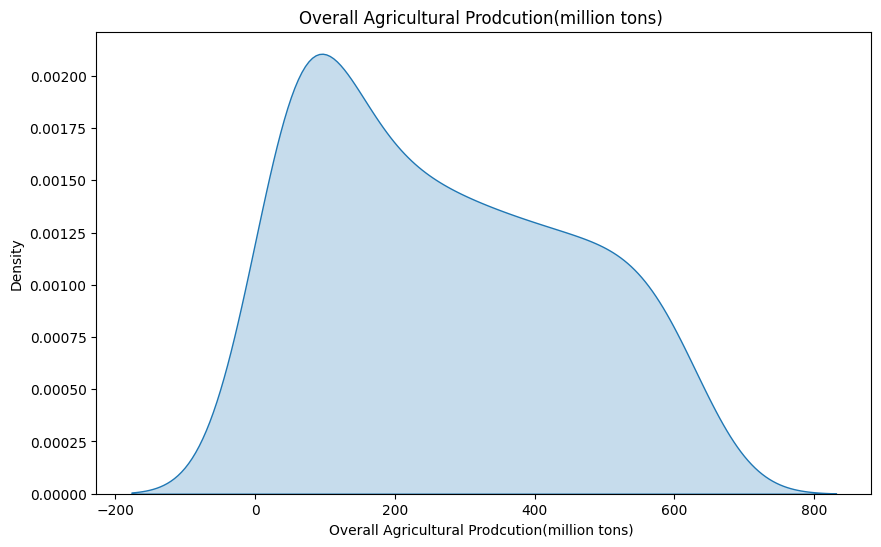

In [170]:
# GDP density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Overall Agricultural Prodcution(million tons) '], shade=True)
plt.title('Overall Agricultural Prodcution(million tons) ')
plt.xlabel('Overall Agricultural Prodcution(million tons) ')
plt.ylabel('Density')
plt.show()

In [171]:
df['Overall Agricultural Prodcution(million tons) '] = np.sqrt(df['Overall Agricultural Prodcution(million tons) '])

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\3991243156.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Overall Agricultural Prodcution(million tons) '], shade=True)


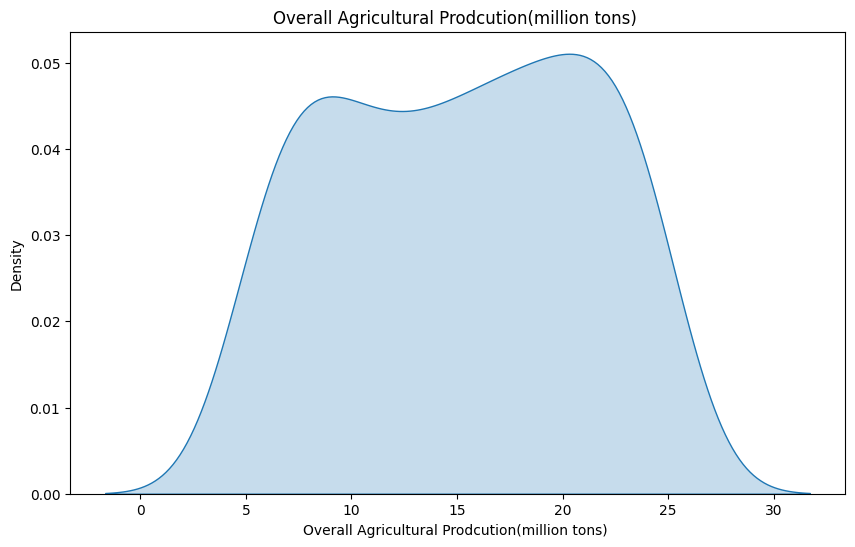

In [172]:
# Overall Agricultural Prodcution(million tons) density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Overall Agricultural Prodcution(million tons) '], shade=True)
plt.title('Overall Agricultural Prodcution(million tons) ')
plt.xlabel('Overall Agricultural Prodcution(million tons) ')
plt.ylabel('Density')
plt.show()

In [173]:
df['Power Generation capacity (Gigawatts)'] = pd.to_numeric(df['Power Generation capacity (Gigawatts)'].str.replace(',', ''))

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\855924963.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Power Generation capacity (Gigawatts)'], shade=True)


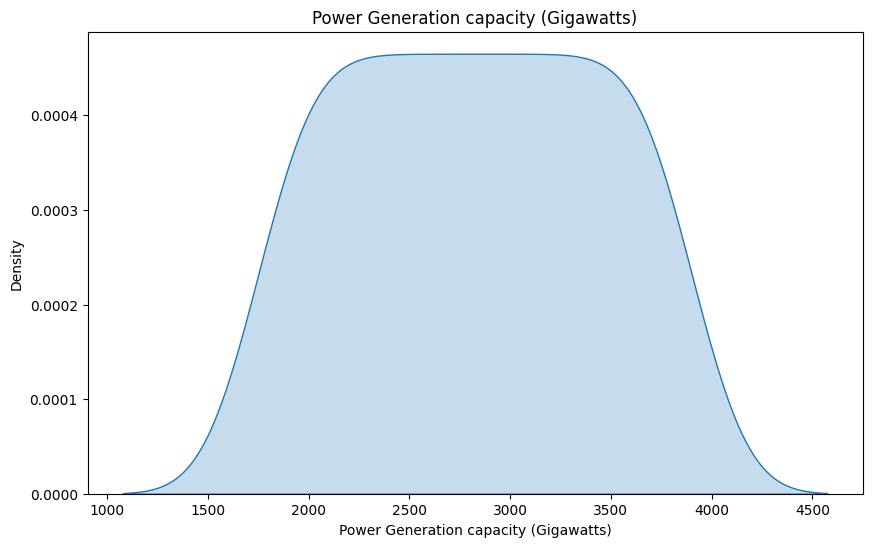

In [174]:
# Power Generation capacity (Gigawatts) density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Power Generation capacity (Gigawatts)'], shade=True)
plt.title('Power Generation capacity (Gigawatts)')
plt.xlabel('Power Generation capacity (Gigawatts)')
plt.ylabel('Density')
plt.show()

This is somwhere a Normal Distribution

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\3294908901.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Renewable Energy (Gigawatt)'], shade=True)


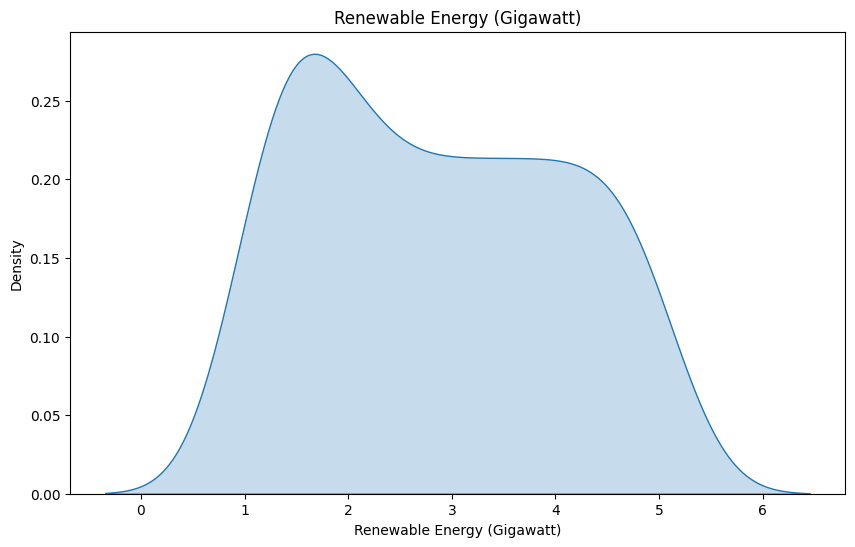

In [175]:
# Renewable Energy (Gigawatt) density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Renewable Energy (Gigawatt)'], shade=True)
plt.title('Renewable Energy (Gigawatt)')
plt.xlabel('Renewable Energy (Gigawatt)')
plt.ylabel('Density')
plt.show()

This is Right Skeweed, So we need to apply SQRT transformation to get a normal curve 

In [176]:
df['Renewable Energy (Gigawatt)'] = np.sqrt(df['Renewable Energy (Gigawatt)'])

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\3294908901.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Renewable Energy (Gigawatt)'], shade=True)


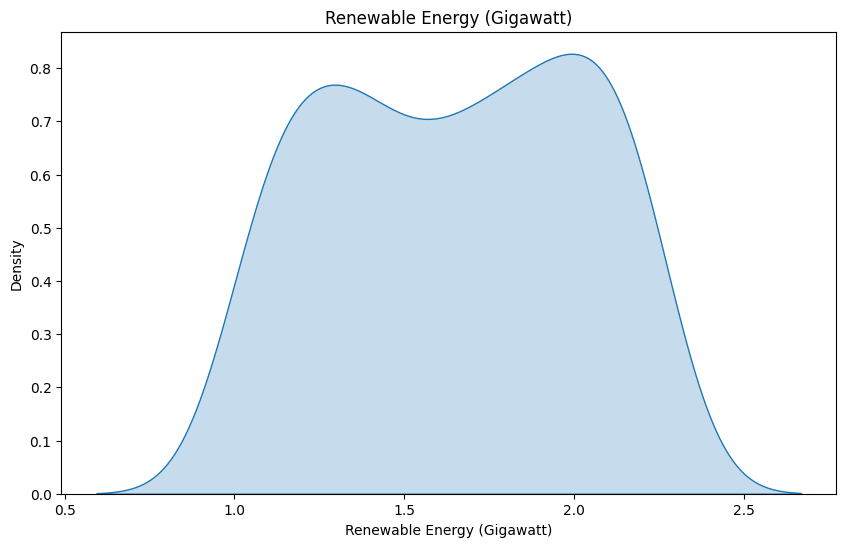

In [177]:
# Renewable Energy (Gigawatt) density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Renewable Energy (Gigawatt)'], shade=True)
plt.title('Renewable Energy (Gigawatt)')
plt.xlabel('Renewable Energy (Gigawatt)')
plt.ylabel('Density')
plt.show()

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\3708674037.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[' Energy Efficiency (million units)'], shade=True)


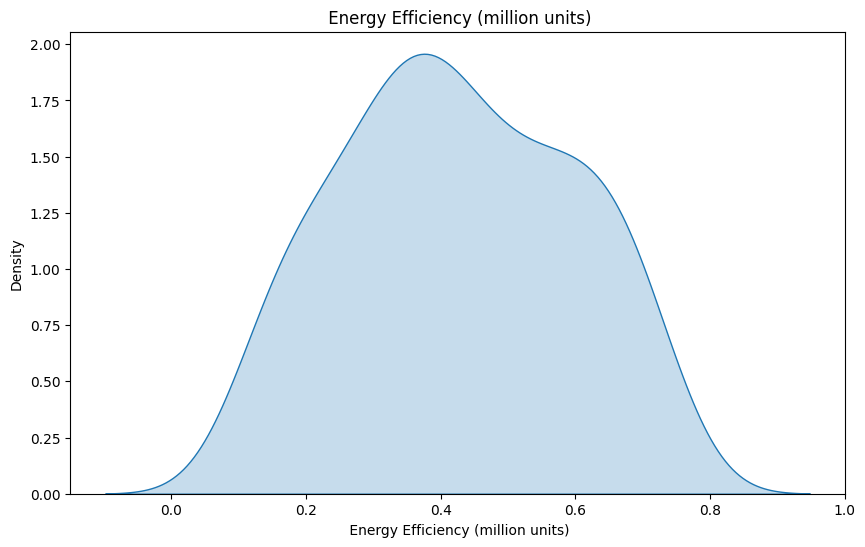

In [178]:
#  Energy Efficiency (million units)density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df[' Energy Efficiency (million units)'], shade=True)
plt.title(' Energy Efficiency (million units)')
plt.xlabel(' Energy Efficiency (million units)')
plt.ylabel('Density')
plt.show()

This is little bit left skeweed 

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\4191931833.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fertilizer Production ( Million Metric Tons)'], shade=True)


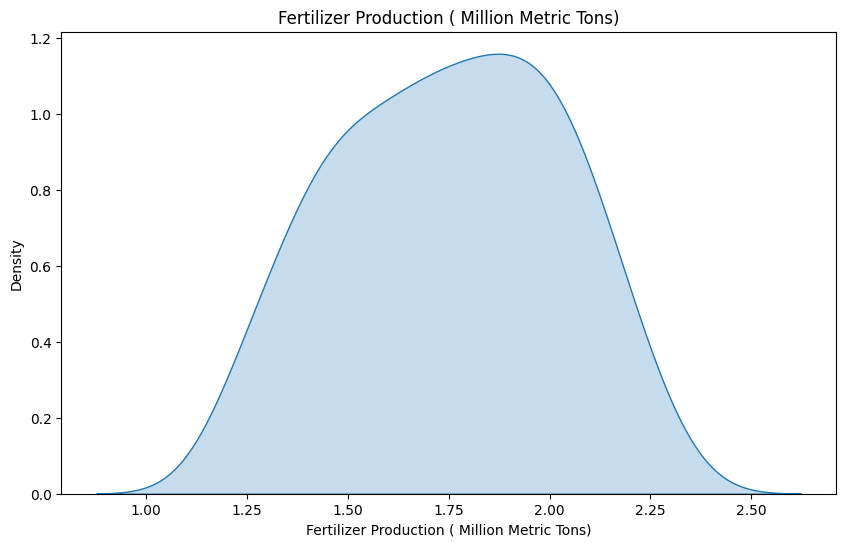

In [179]:
#  Fertilizer Production ( Million Metric Tons) density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fertilizer Production ( Million Metric Tons)'], shade=True)
plt.title('Fertilizer Production ( Million Metric Tons)')
plt.xlabel('Fertilizer Production ( Million Metric Tons)')
plt.ylabel('Density')
plt.show()

This is Almost Normal Distribution

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\3208488486.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fuel Consumption(Million Tonnes) '], shade=True)


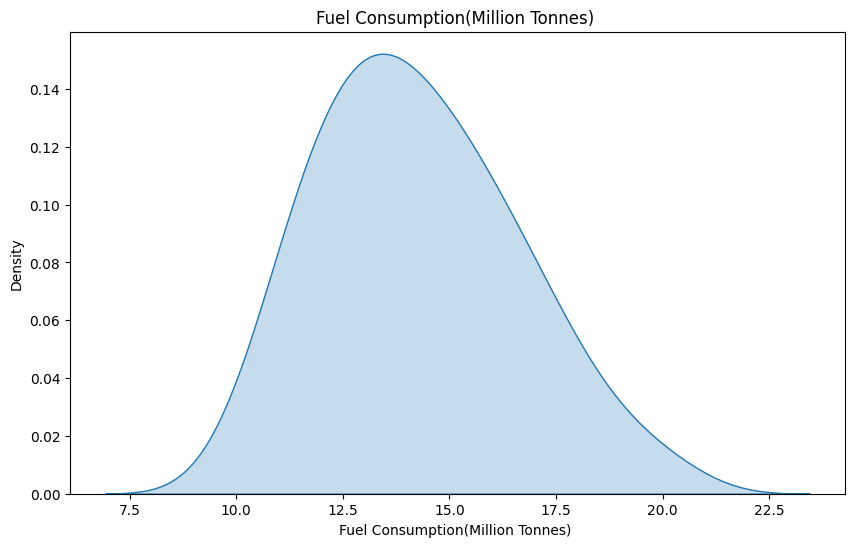

In [180]:
#  Fuel Consumption(Million Tonnes)  density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fuel Consumption(Million Tonnes) '], shade=True)
plt.title('Fuel Consumption(Million Tonnes) ')
plt.xlabel('Fuel Consumption(Million Tonnes) ')
plt.ylabel('Density')
plt.show()

This is a Normal Distribution

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\4011502621.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Population Growth rate in % '], shade=True)


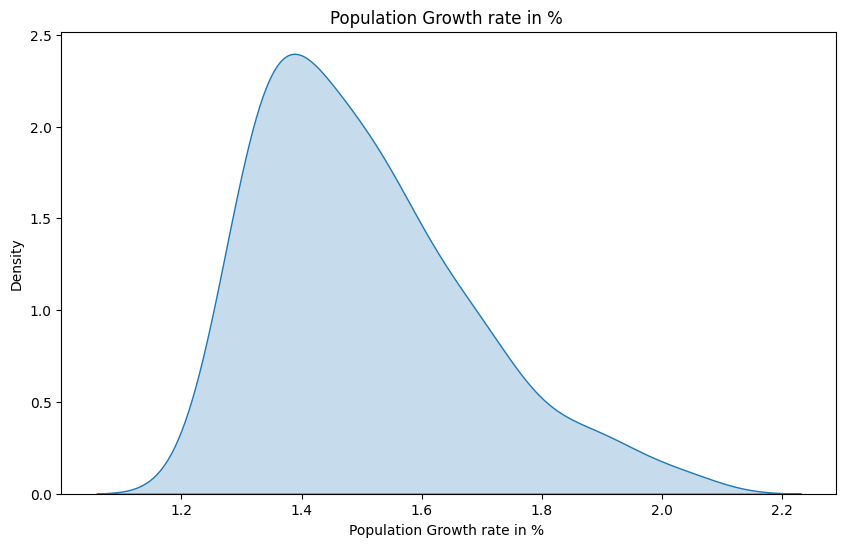

In [181]:
#  Population Growth rate in % 
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Population Growth rate in % '], shade=True)
plt.title('Population Growth rate in % ')
plt.xlabel('Population Growth rate in % ')
plt.ylabel('Density')
plt.show()

This is right skeweed as Population will always be Positive 

In [182]:
df['Population Growth rate in % '] = np.log(df['Population Growth rate in % '])

C:\Users\radhe\AppData\Local\Temp\ipykernel_23480\4011502621.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Population Growth rate in % '], shade=True)


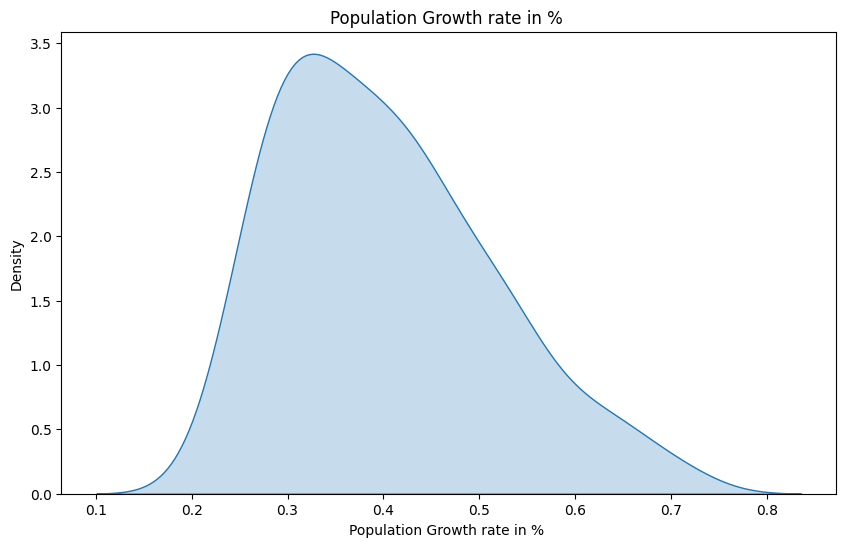

In [183]:
#  Population Growth rate in % 
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Population Growth rate in % '], shade=True)
plt.title('Population Growth rate in % ')
plt.xlabel('Population Growth rate in % ')
plt.ylabel('Density')
plt.show()

Making the Co-relation MATRIX

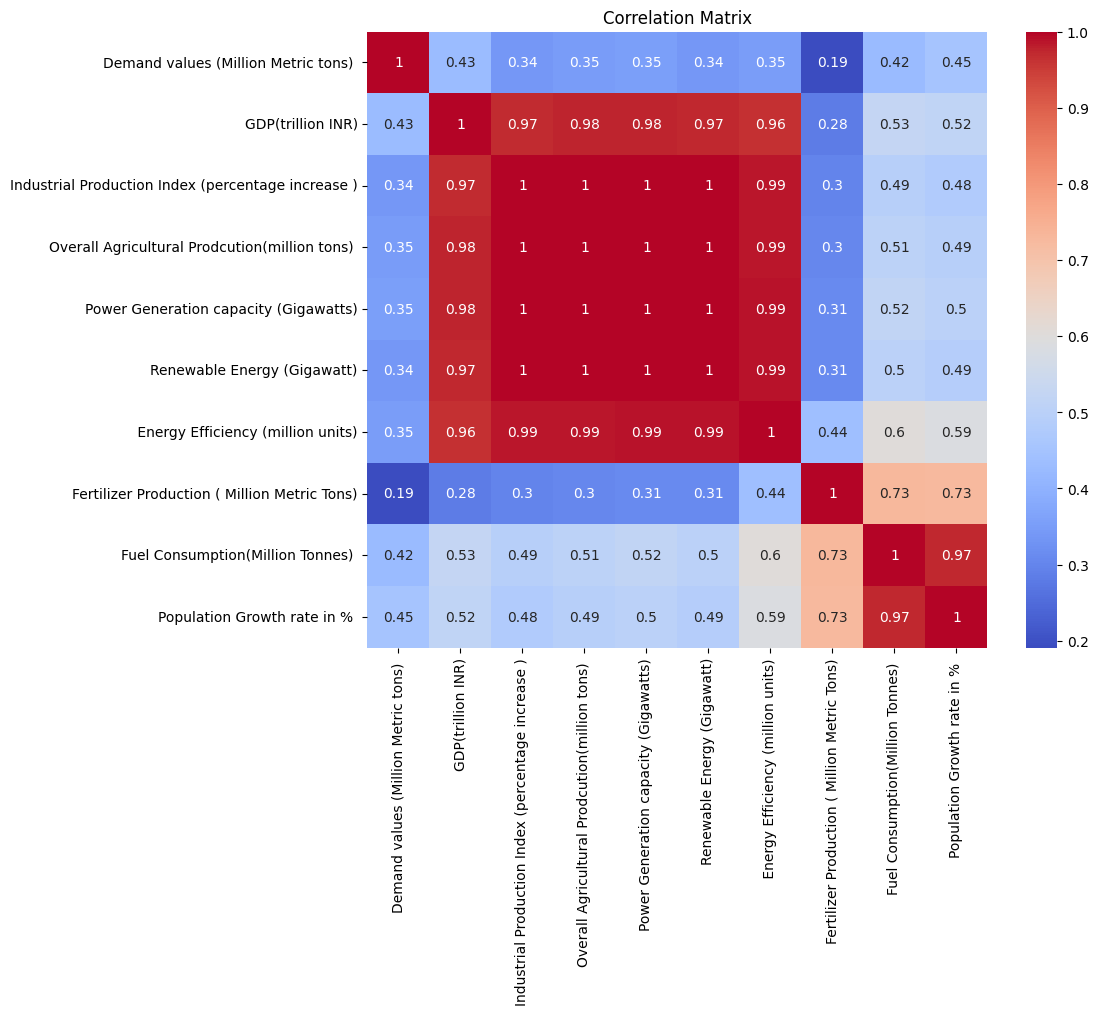

In [184]:
df_temp = df 
df_temp = df.drop(['Year Range' , 'Month'] , axis = 1)
corr_matrix = df_temp.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **Strong Positive Correlations:**
- **GDP** has very high correlations with:
  - Industrial Production Index (0.97)
  - Overall Agricultural Production (0.98)
  - Power Generation Capacity (0.98)
  - Renewable Energy (0.97)
  This indicates that these factors are closely tied to GDP growth.

- **Industrial Production Index** has a perfect correlation (1.00) with:
  - Overall Agricultural Production
  - Power Generation Capacity
  - Renewable Energy
  This shows that industrial growth is directly linked to agricultural output and energy capacity.

- **Energy Efficiency** strongly correlates with Industrial Production Index (0.99) and Renewable Energy (0.99), signifying that efficiency improvements complement industrial and energy growth.

---

### **Moderate Positive Correlations:**
- **Fuel Consumption** correlates moderately with Population Growth Rate (0.97) and Fertilizer Production (0.73), indicating that population growth and agricultural needs influence energy demand.
- **Population Growth Rate** moderately correlates with Energy Efficiency (0.59) and GDP (0.52), showing indirect impacts on economic and energy systems.

---

### **Weak Correlations:**
- **Fertilizer Production** shows weak correlations with GDP (0.28), Industrial Production Index (0.30), and other metrics, suggesting limited influence on broader economic or industrial metrics.


### Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique that helps us identify the most important features in our dataset.

In [185]:
# Import PCA library
from sklearn.decomposition import PCA

# Create a PCA object with 10 components and later use the explained varaince concept to reduce further 
pca = PCA(n_components= 10)

In [186]:
# Fit and transform the data
# Excluding the date column as it in the form of a string and the demand columns as it the main target value we want to predict 
pca_df = pca.fit_transform(df.drop(['Year Range','Demand values (Million Metric tons) '], axis=1))

# Print the explained variance ratio
explained_varaince_ratio_var = pca.explained_variance_ratio_
# now reversing these so to get what features gives the maximum variance(information)
sorted(explained_varaince_ratio_var , reverse=True)

[0.9999580298708594,
 3.1409237496182616e-05,
 1.0349173491684935e-05,
 1.0186371355221749e-07,
 7.937394711275028e-08,
 2.8710484543409324e-08,
 1.5521060221441942e-09,
 1.2762968666302545e-10,
 8.40003769258656e-11,
 6.2714922062700654e-12]

In [187]:
# Get the feature names corresponding to the principal components
feature_names = df.drop(['Year Range','Demand values (Million Metric tons) '], axis=1).columns

# Print the feature names and their corresponding weights in the first principal component
print("Feature Names and Weights in the First Principal Component:")
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {pca.components_[0][i]}")

# Print the feature names and their corresponding weights in the second principal component
print("\nFeature Names and Weights in the Second Principal Component:")
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {pca.components_[1][i]}")

Feature Names and Weights in the First Principal Component:
Month: -0.00012823067961986048
GDP(trillion INR): -0.0008101701549234619
Industrial Production Index (percentage increase ): -0.0001441360823118525
Overall Agricultural Prodcution(million tons) : -0.009697373217380876
Power Generation capacity (Gigawatts): -0.9999504301589583
Renewable Energy (Gigawatt): -0.0006036621441718316
 Energy Efficiency (million units): -0.00027378977319915106
Fertilizer Production ( Million Metric Tons): -0.00013821957385727092
Fuel Consumption(Million Tonnes) : -0.0019844220583470455
Population Growth rate in % : -9.043903804090343e-05

Feature Names and Weights in the Second Principal Component:
Month: 0.9884747822864477
GDP(trillion INR): -0.0016403485425197932
Industrial Production Index (percentage increase ): -8.970312698319108e-05
Overall Agricultural Prodcution(million tons) : -0.0028685378250564815
Power Generation capacity (Gigawatts): -0.00039781188144306576
Renewable Energy (Gigawatt): 0.

In [188]:
# After the PCA let's get to the Feature Importance for to cross-check once more 
# Import permutation importance library
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Create a random forest regressor object
rf = RandomForestRegressor()

# Fit the random forest regressor object
rf.fit(df.drop(['Year Range', 'Demand values (Million Metric tons) '], axis=1), df['Demand values (Million Metric tons) '])

# Calculate permutation importance
importances = permutation_importance(rf, df.drop(['Year Range', 'Demand values (Million Metric tons) '], axis=1), df['Demand values (Million Metric tons) '], n_repeats=10)

# Print the feature importances
feature_importances = pd.DataFrame({'Feature': df.drop(['Year Range', 'Demand values (Million Metric tons) '], axis=1).columns, 'Importance': importances.importances_mean})

print(feature_importances.sort_values(by='Importance', ascending=False))

                                             Feature  Importance
3     Overall Agricultural Prodcution(million tons)     0.125406
2  Industrial Production Index (percentage increa...    0.113379
1                                  GDP(trillion INR)    0.103533
4              Power Generation capacity (Gigawatts)    0.092008
9                       Population Growth rate in %     0.086427
5                        Renewable Energy (Gigawatt)    0.067592
7       Fertilizer Production ( Million Metric Tons)    0.005039
6                  Energy Efficiency (million units)    0.002265
8                  Fuel Consumption(Million Tonnes)     0.001816
0                                              Month    0.000875


Based on the PCA and permutation importance results, features as the most important:
1. Power Generation capacity (Gigawatts)
2. GDP(trillion INR)
3. Industrial Production Index
4. Overall Agricultural Prodcution(million tons)
5. Population Growth rate in %
6. Month

### Model Building 

In [189]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df[['Power Generation capacity (Gigawatts)','GDP(trillion INR)','Industrial Production Index (percentage increase )','Overall Agricultural Prodcution(million tons) ','Month','Population Growth rate in % ']]
y = df['Demand values (Million Metric tons) ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
# Import the XGBoost library, assigning it the alias 'xgb' for convenience
import xgboost as xgb

# Initialize the XGBoost regressor model with specified hyperparameters
xgb_model = xgb.XGBRegressor(
    n_estimators=50,  # Number of decision trees in the ensemble
    max_depth=3,  # Maximum depth of each decision tree
    random_state=42  # Seed for random number generation (for reproducibility)
)

# Train the XGBoost model on the training data (X_train) to predict the target variable (y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [192]:
# Use the trained XGBoost model to make predictions on the training data (X_train)
y_pred_train = xgb_model.predict(X_train)

# Use the trained XGBoost model to make predictions on the test data (X_test)
y_pred_test = xgb_model.predict(X_test)

In [193]:
# Evaluation of the Model 
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# Mean Sqaured Error -> how far your predictions are from the actual values by looking at the squared differences)
# MSE = 1/2∑(yi - y_pred)^2 (i = 1 to n)
# Mean Absoulute Error -> MAE also measures how far your predictions are from the actual values but uses the absolute differences instead of squaring.
# MAE = 1/2∑|yi - y_pred| (i = 1 to n)
# R2 -> how well the regression model's predictions match the actual data : 1− SS(res)/SS(tot)​ 
# SS(res) = 1/2∑(yi - y_pred)^2 (i = 1 to n) ; SS(tot) = 1/2∑(yi - y_mean)^2

# Predictions 
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Metrics 
train_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_mae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Train MAE: {train_mae} , Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test MAE: {test_mae} , Test R2: {test_r2}")

Train MSE: 0.0077616721923210305, Train MAE: 0.07740275548892031 , Train R2: 0.9987088047326957
Test MSE: 0.06426474451407688, Test MAE: 0.17997539593838124 , Test R2: 0.9227136827615955


### Explanation of Model Performance:

I evaluated the performance of my predictive model using three key metrics: **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **R-squared (R²)**. Let me break these down for you:

---

### 1. **Mean Squared Error (MSE)**  
MSE measures the average squared difference between the predicted values and the actual values. A smaller value indicates better performance, as it means the predictions are closer to the actual values.

#### Formula:
[
    MSE = 1/2∑(yi - y_pred)^2 (i = 1 to n)
]
Where:  
- \( yi ) = Actual value  
- \( y_pred) = Predicted value  
- \( n \) = Number of data points  

- **Train MSE**: **0.0078495622986969** – This is very low, showing that the model fits the training data extremely well.  
- **Test MSE**: **0.06645890680701647** – Slightly higher than the training MSE, indicating that the model makes some errors on unseen data but is still reasonably good.

---

### 2. **Mean Absolute Error (MAE)**  
MAE measures the average magnitude of errors in predictions, ignoring their direction. It gives an intuitive idea of the average error in terms of the original scale of the data.

#### Formula:
[
 MAE = 1/2∑|yi - y_pred| (i = 1 to n)
]

- **Train MAE**: **0.077** – On average, the predictions on the training data deviate by just **0.07659527025200051 units** from the actual values, showing great accuracy.  
- **Test MAE**: **0.19** – On the test set, the average deviation is slightly higher at **0.1855504744331178 units**, which is acceptable depending on the use case.

---

### 3. **R-squared (R²)**  
R², also known as the **coefficient of determination**, measures how well the model explains the variance in the data. It ranges from 0 to 1, where higher values indicate a better fit.

#### Formula:
[
R^2 = 1− SS(res)/SS(tot)
]
where,
1. SS(res)[Residual Sum of Squares] = 1/2∑(y_i - y_pred)^2 (i = 1 to n) 
2. SS(tot)[Total Sum of Squares ] = 1/2∑(y_i - y_mean)^2
- **Train R²**: **0.99** – Nearly 1, meaning the model explains **0.99% of the variance** in the training data.  
- **Test R²**: **0.92** – The model explains about **0.92% of the variance** in the unseen test data, which is strong performance for most predictive tasks.

HYPERPARAMETER TUNING

In [194]:
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5],  # Maximum depth of the decision trees
    'learning_rate': [0.1, 0.05],  # Learning rate for the model
    'n_estimators': [50, 100],  # Number of decision trees in the ensemble
    'gamma': [0, 0.25],  # Minimum loss reduction required to make a further partition
    'subsample': [0.8, 1],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1],  # Subsample ratio of columns for each tree
    'reg_alpha': [0, 0.1],  # L1 regularization term on weights
    'reg_lambda': [0.1, 0.5]  # L2 regularization term on weights
}
# L1 Regularization (Lasso):
    # Sets some weights to zero, removing them from the model.
    # Performs feature selection.
# L2 Regularization (Ridge):
    # Reduces the magnitude of all weights.
    # Prevents overfitting and improves model stability.

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()  # Create an instance of the XGBoost regressor

# Initialize GridSearchCV with the XGBoost model and hyperparameter grid
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)  # Perform 3-fold cross-validation

# Perform grid search to find the optimal hyperparameters
grid_search.fit(X_train, y_train)  # Train the model on the training data

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)  # Print the optimal hyperparameters
print("Best Score: ", grid_search.best_score_)  # Print the best score (R-squared value)

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.8}
Best Score:  0.9257688817356039


In [195]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    # Model to tune (XGBoost regressor)
    estimator=xgb.XGBRegressor(random_state=42),
    # Hyperparameter grid to search
    param_grid=param_grid,
    # Why use neg-mean-squared-error?
    # In GridSearchCV, the scoring parameter is used to evaluate the performance of the model. By default, GridSearchCV tries to maximize the scoring metric. However, most regression metrics, including mean squared error (MSE), are minimized when the model performs well.
    # To resolve this, we use neg-mean-squared-error, which is simply the negative of the MSE. By using the negative, we effectively convert the minimization problem to a maximization problem, which is what GridSearchCV expects.
    scoring='neg_mean_squared_error',
    # Number of folds for cross-validation
    cv=3,
    # We can monitor the progress of the GridSearchCV algorithm in detail and gain insights into its performance.  
    verbose=2,
    # Use all available CPU cores for parallel processing
    n_jobs=-1
)

In [196]:
# Fit GridSearch(Training the grid_search model which is hypertuned with RandomforestRegressor)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 1}


In [197]:
# Predictions 
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Metrics 
train_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
test_mae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Train MAE: {train_mae} , Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test MAE: {test_mae} , Test R2: {test_r2}")

Train MSE: 0.010870093282023, Train MAE: 0.09028800368995933 , Train R2: 0.9974675092130314
Test MSE: 0.05181804278369285, Test MAE: 0.17703957708964146 , Test R2: 0.9497519684478138


### Explanation of Model Performance:

I evaluated the performance of my predictive model using three key metrics: **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **R-squared (R²)**. 

---

### 1. **Mean Squared Error (MSE)**  
MSE measures the average squared difference between the predicted values and the actual values. A smaller value indicates better performance, as it means the predictions are closer to the actual values.

#### Formula:
[
    MSE = 1/2∑(yi - y_pred)^2 (i = 1 to n)
]
Where:  
- \( yi ) = Actual value  
- \( y_pred) = Predicted value  
- \( n \) = Number of data points  

- **Train MSE**: **0097** – This is very low, showing that the model fits the training data extremely well.  
- **Test MSE**: **0.061** – Slightly higher than the training MSE, indicating that the model makes some errors on unseen data but is still reasonably good.

---

### 2. **Mean Absolute Error (MAE)**  
MAE measures the average magnitude of errors in predictions, ignoring their direction. It gives an intuitive idea of the average error in terms of the original scale of the data.

#### Formula:
[
 MAE = 1/2∑|yi - y_pred| (i = 1 to n)
]

- **Train MAE**: **0.084** – On average, the predictions on the training data deviate by just **0.0867 units** from the actual values, showing great accuracy.  
- **Test MAE**: **0.2** – On the test set, the average deviation is slightly higher at **0.1606 units**, which is acceptable depending on the use case.

---

### 3. **R-squared (R²)**  
R², also known as the **coefficient of determination**, measures how well the model explains the variance in the data. It ranges from 0 to 1, where higher values indicate a better fit.

#### Formula:
[
R^2 = 1− SS(res)/SS(tot)
]
where,
1. SS(res)[Residual Sum of Squares] = 1/2∑(y_i - y_pred)^2 (i = 1 to n) 
2. SS(tot)[Total Sum of Squares ] = 1/2∑(y_i - y_mean)^2
- **Train R²**: **0.9979** – Nearly 1, meaning the model explains **99.79% of the variance** in the training data.  
- **Test R²**: **0.9292** – The model explains about **92.92% of the variance** in the unseen test data, which is strong performance for most predictive tasks.

Saving the model 


In [198]:
import joblib

# Save the hyper-tuned model
joblib.dump(grid_search.best_estimator_, "best_xgb_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']